In [155]:
import pandas as pd
from io import StringIO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Load Branch Level Data and Member Level Data
df1 = pd.read_csv("data/Florida_County_Info - Sheet1.csv")
df1.rename(columns={'Count': 'County'}, inplace=True)

In [156]:
import pandas as pd
from io import StringIO

data_comma_separated = """Rank,County,Small Business Establishments,Establishments per 1,000 Residents,Share
1,Santa Rosa,3,209,16.6,99.8%
2,Hendry,681,16.9,99.9%
3,Washington,426,17.1,99.5%
4,Putnam,1,276,17.2,99.8%
5,Madison,314,17.4,100.0%
6,Polk,13,130,17.4,99.7%
7,Jackson,823,17.5,99.5%
8,Hernando,3,657,18.2,99.9%
9,Citrus,2,895,18.3,99.8%
10,Levy,810,18.3,100.0%
11,Pasco,11,112,19.0,99.9%
12,Osceola,7,707,19.1,99.8%
13,Clay,4,263,19.2,99.9%
14,Taylor,403,19.4,99.8%
15,Jefferson,282,19.5,100.0%
16,St. Lucie,6,750,19.6,99.9%
17,Highlands,2,043,19.8,100.0%
18,Marion,7,801,20.3,99.9%
19,Flagler,2,484,20.6,100.0%
20,Columbia,1,452,20.8,99.9%
21,Lake,8,333,21.0,99.9%
22,Okeechobee,868,21.7,99.8%
23,Nassau,2,071,21.9,100.0%
24,Charlotte,4,308,22.1,100.0%
25,Escambia,7,399,22.9,99.9%
26,Alachua,6,509,23.1,99.8%
27,Gulf,343,23.7,99.7%
28,Brevard,15,008,24.3,99.8%
29,Volusia,13,856,24.5,99.9%
30,Manatee,10,377,25.1,99.9%
31,Franklin,309,25.4,100.0%
32,St. Johns,7,692,26.2,99.9%
33,Lee,21,184,26.8,99.9%
34,Leon,7,932,26.8,99.9%
35,Okaloosa,5,789,27.1,99.9%
36,Duval,27,373,27.3,99.7%
37,Bay,4,989,27.8,99.9%
38,Hillsborough,41,277,27.8,99.7%
39,Indian River,4,626,28.2,99.9%
40,Orange,43,056,30.2,99.7%
41,Seminole,14,666,31.1,99.8%
42,Pinellas,30,937,32.3,99.8%
43,Sarasota,15,192,33.9,100.0%
44,Broward,67,026,34.6,99.8%
45,Collier,13,535,35.0,99.9%
46,Miami-Dade,94,470,35.4,99.9%
47,Palm Beach,53,680,35.7,99.9%
48,Walton,2,965,37.1,99.9%
49,Martin,6,041,37.7,99.9%
50,Monroe,4,009,48.7,100.0%"""

# load and display data
df2 = pd.read_csv(StringIO(data_comma_separated))
print(df2)

    Rank        County  Small Business Establishments  Establishments per 1  \
0      1    Santa Rosa                              3                 209.0   
1      2        Hendry                            681                  16.9   
2      3    Washington                            426                  17.1   
3      4        Putnam                              1                 276.0   
4      5       Madison                            314                  17.4   
5      6          Polk                             13                 130.0   
6      7       Jackson                            823                  17.5   
7      8      Hernando                              3                 657.0   
8      9        Citrus                              2                 895.0   
9     10          Levy                            810                  18.3   
10    11         Pasco                             11                 112.0   
11    12       Osceola                              

In [157]:
print(df1.columns)
print(df2.columns)

Index(['Rank', 'County', 'Per Capita Income', 'Median Household Income',
       'Median Family Income', 'Population', 'Number of households',
       'Total Number of Small Businesses', 'Number of Credit Unions'],
      dtype='object')
Index(['Rank', 'County', 'Small Business Establishments',
       'Establishments per 1', '000 Residents', 'Share'],
      dtype='object')


In [158]:
# merge datasets
merged_data = pd.merge(df1, df2, on="County")

merged_data.rename(columns={'Establishments per 1': 'Establishments per 1000 residents'}, inplace=True)
merged_data = merged_data.drop('000 Residents', axis=1)
merged_data = merged_data.drop('Small Business Establishments', axis=1)



# clean data
columns_to_clean = ['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Number of households', 'Population']

# loop through columns and remove dollar signs and commas
for column in columns_to_clean:
    merged_data[column] = merged_data[column].str.replace('[\$,]', '', regex=True)
    
merged_data['Share'] = pd.to_numeric(merged_data['Share'].str.rstrip('%'), errors='coerce')
merged_data = merged_data.drop(['Rank_x', 'Rank_y'], axis=1)

merged_data = merged_data.set_index('County')
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')
merged_data = merged_data.fillna(0)



    
merged_data

,Per Capita Income,Median Household Income,Median Family Income,Population,Number of households,Total Number of Small Businesses,Number of Credit Unions,Establishments per 1000 residents,Share
County,,,,,,,,,
Collier,37046,58106,68556,321520,133179,13535.0,3.0,535.0,99.9
St. Johns,36027,62663,79080,190039,75338,7692.0,3.0,692.0,99.9
Martin,35772,53210,70271,146318,63899,6041.0,3.0,41.0,99.9
Monroe,35516,53821,66152,73090,32629,4009.0,3.0,9.0,100.0
Palm Beach,33610,53242,64445,1320134,544227,53680.0,11.0,680.0,99.9
Sarasota,33045,49388,62326,379448,175746,15192.0,9.0,192.0,100.0
Indian River,31918,47341,57477,138028,60176,4626.0,4.0,626.0,99.9
Seminole,29795,58971,70597,422718,164706,14666.0,10.0,666.0,99.8
Lee,29445,50014,58950,618754,259818,21184.0,5.0,184.0,99.9


In [159]:
# Check the data types of each column
print(merged_data.dtypes)

Per Capita Income                      int64
Median Household Income                int64
Median Family Income                   int64
Population                             int64
Number of households                   int64
Total Number of Small Businesses     float64
Number of Credit Unions              float64
Establishments per 1000 residents    float64
Share                                float64
dtype: object


In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X contains the features, and y contains the target variable
X = merged_data.drop('Share', axis=1)
y = merged_data['Share']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# randome forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# train
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Squared Error: 8.34816720000006
R-squared: 0.9947706585699941


In [161]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
# set the target variable
target_column = 'Number of Credit Unions'
y = merged_data[target_column]

# set features
X = merged_data.drop([target_column], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions) 

print(f"Mean Squared Error: {mse}")
print(f'R-squared: {r2}')



Mean Squared Error: 9.42518
R-squared: 0.6539948604992658


In [162]:
# get feature importances to find the total small business establishments
feature_importances = model.feature_importances_

# create datafram to displace feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# sort
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# print
print(feature_importance_df)

                             Feature  Importance
3                         Population    0.289129
4               Number of households    0.258212
5   Total Number of Small Businesses    0.237611
0                  Per Capita Income    0.058341
6  Establishments per 1000 residents    0.055281
2               Median Family Income    0.051343
1            Median Household Income    0.039309
7                              Share    0.010775


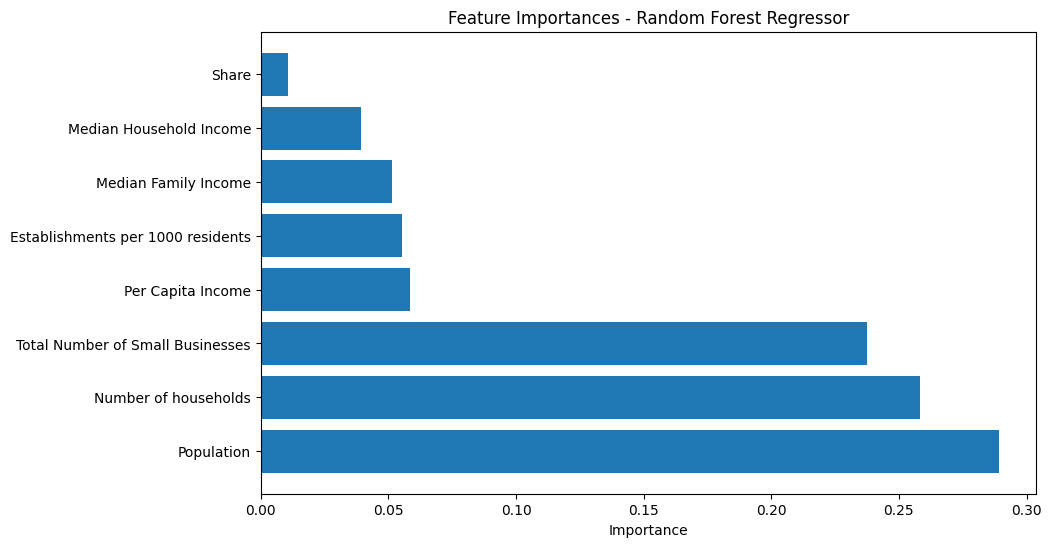

In [163]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances - Random Forest Regressor')
plt.show()

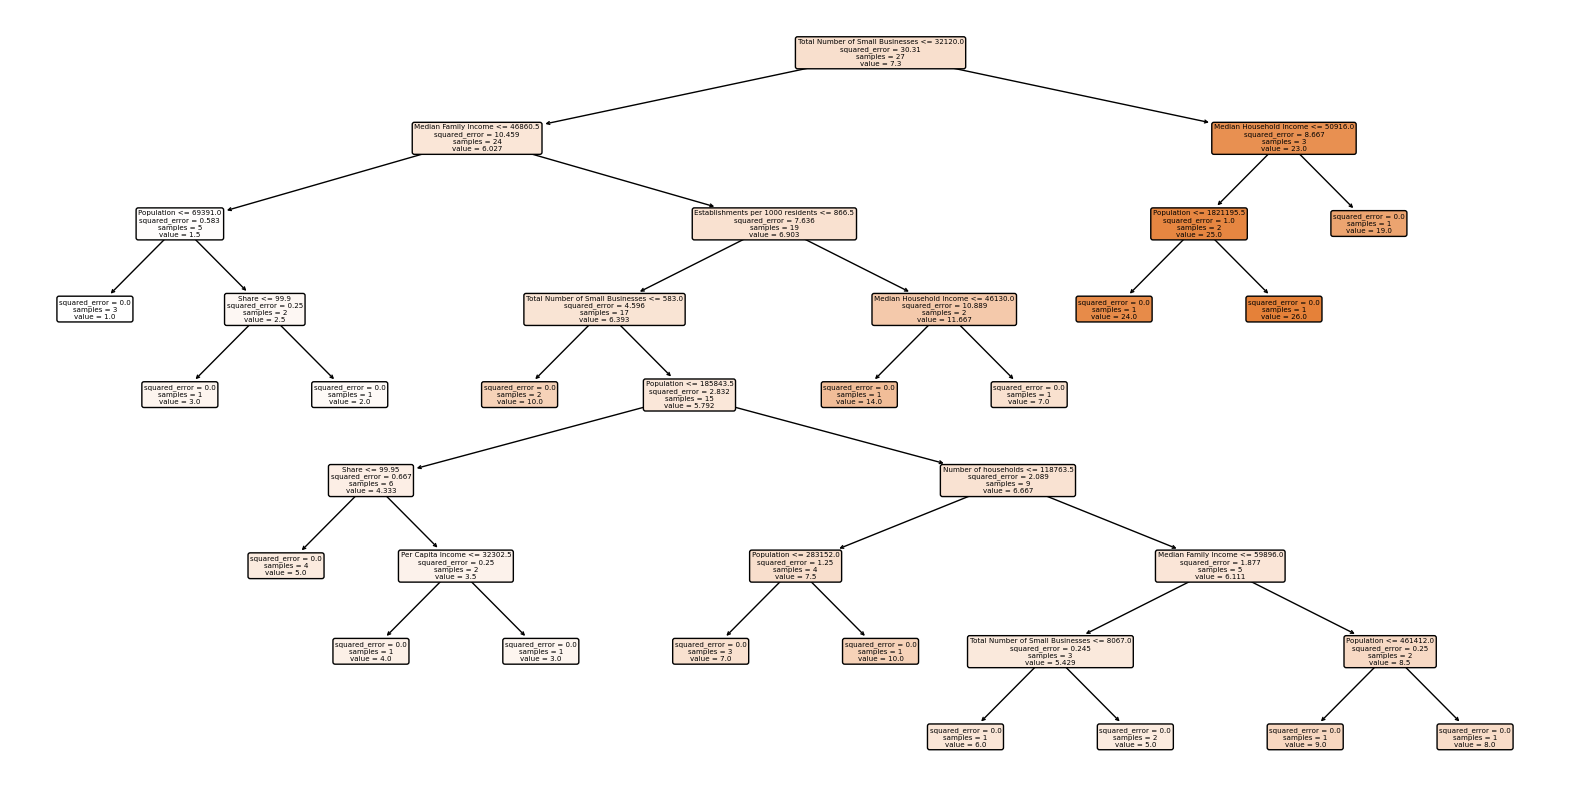

In [164]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, class_names=['Not Churn', 'Churn'])
plt.show()


Mean Squared Error: 4629280.129850002
R-squared: 0.7719016166316764
                             Feature  Importance
0                  Per Capita Income    0.488364
1               Median Family Income    0.395920
6  Establishments per 1000 residents    0.033417
4   Total Number of Small Businesses    0.027694
2                         Population    0.022943
3               Number of households    0.016948
5            Number of Credit Unions    0.012898
7                              Share    0.001817


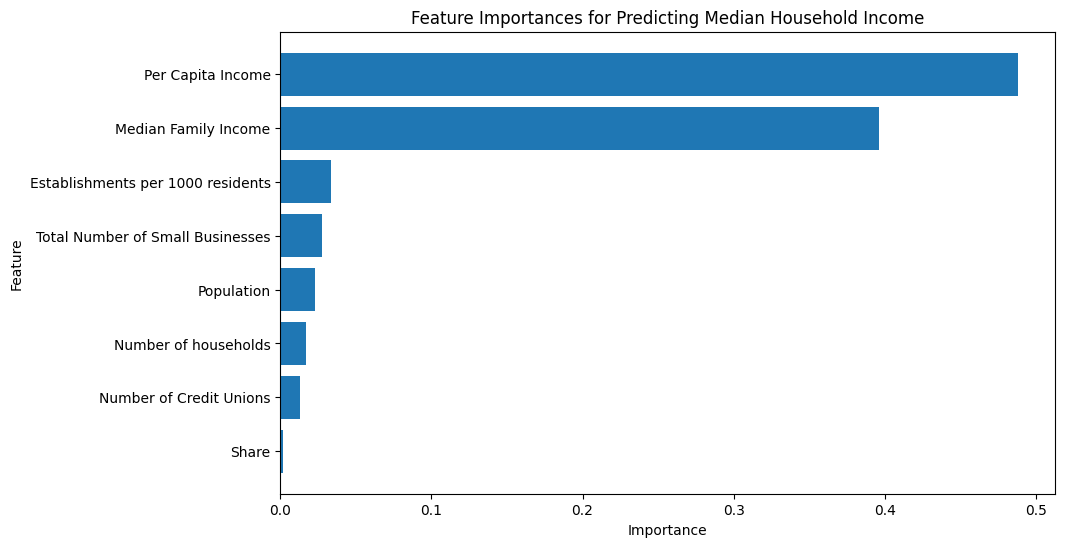

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# convert non-numeric columns to numeric using Label Encoding
label_encoders = {}
for column in merged_data.columns:
    if merged_data[column].dtype == object:
        le = LabelEncoder()
        merged_data[column] = le.fit_transform(merged_data[column])
        label_encoders[column] = le

# Set the target variable
target_column = 'Median Household Income'
y = merged_data[target_column]

# set features
X = merged_data.drop([target_column], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f'R-squared: {r2}')

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importance_df)

# Visualization of Feature Importances
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance']) 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Predicting Median Household Income')
plt.gca().invert_yaxis()  
plt.show()

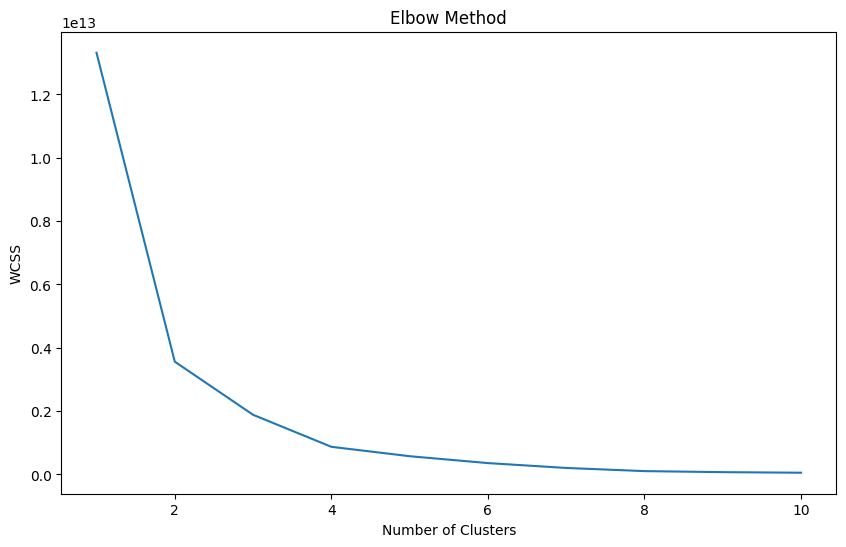

          County  Cluster
0        Collier        0
1      St. Johns        0
2         Martin        0
3         Monroe        0
4     Palm Beach        1
5       Sarasota        0
6   Indian River        0
7       Seminole        0
8            Lee        1
9         Nassau        0
10      Pinellas        1
11       Broward        2
12      Okaloosa        0
13       Manatee        0
14        Walton        0
15       Brevard        1
16  Hillsborough        1
17     Charlotte        0
18          Clay        0
19         Duval        1
20          Leon        0
21        Orange        1
22    Santa Rosa        0
23          Lake        0
24           Bay        0
25       Flagler        0
26       Volusia        0
27       Alachua        0
28         Pasco        0
29      Escambia        0
30     St. Lucie        0
31    Miami-Dade        2
32      Hernando        0
33        Citrus        0
34        Marion        0
35          Polk        1
36      Franklin        0
37       Osc

In [166]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# drop non-numeric columns
X = merged_data.select_dtypes(include=['float64', 'int64'])

# determine optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the Elbow method, choose the optimal number of clusters and fit the model
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add the cluster labels 
merged_data['Cluster'] = kmeans.labels_

merged_data.reset_index(inplace=True)


# Display the cluster assignments
print(merged_data[['County', 'Cluster']])


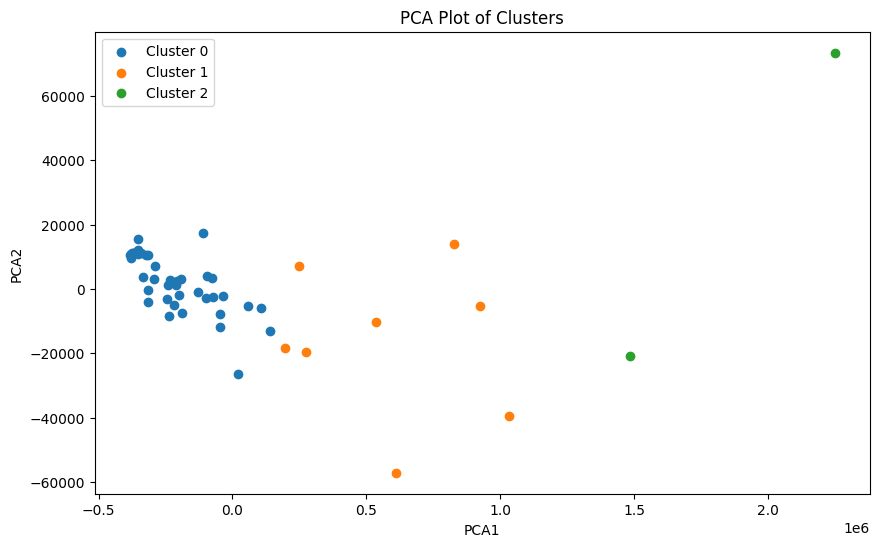

In [167]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a DataFrame named 'merged_data' with 'Cluster' column
# Extract numerical columns for PCA
numerical_data = merged_data[['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Population', 'Number of households', 'Total Number of Small Businesses', 'Share']]

# Perform PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data)

# Add the 'Cluster' column to the reduced data
pca_data = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_data['Cluster'] = merged_data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster in pca_data['Cluster'].unique():
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('PCA Plot of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()




Mean Squared Error: 3634221.00
R-squared: 0.94


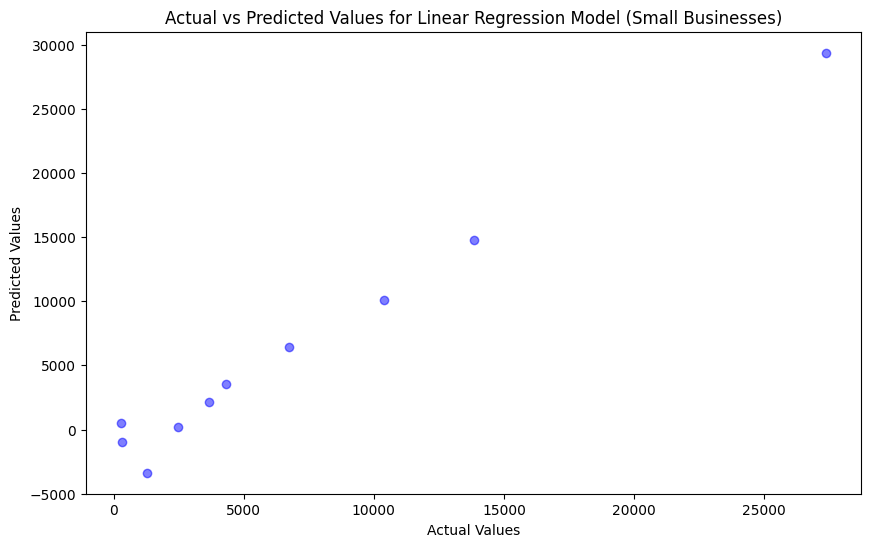

In [168]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# features and target variable
X = merged_data[['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Population', 'Number of households', 'Share']]
y = merged_data['Total Number of Small Businesses']  # Change the target variable

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"\nMean Squared Error: {mse:.2f}")
print(f'R-squared: {r2:.2f}')

# Plot predicted vs actual values
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Linear Regression Model (Small Businesses)")
plt.show()




[[8 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

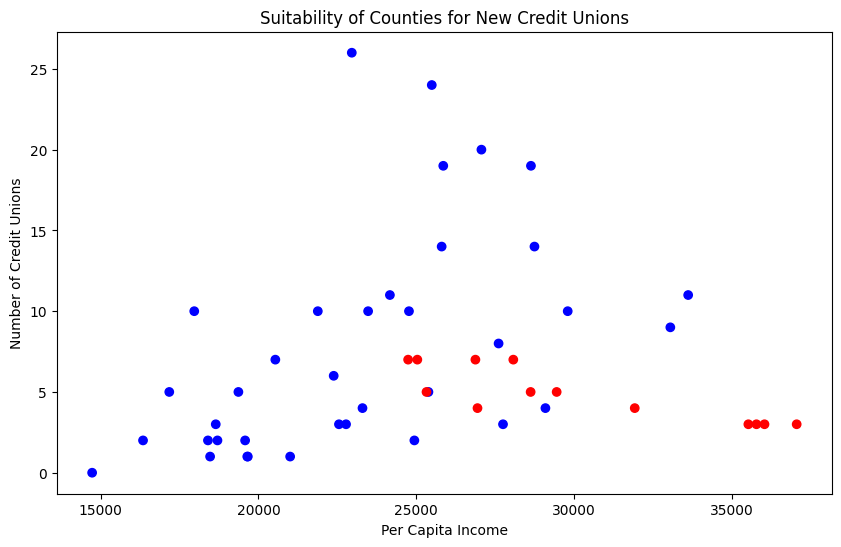

Counties suitable for a new credit union:
0
1
2
3
5
6
9
20
22
27


In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# calculate adjusted percentiles
percentile_40_income = merged_data['Per Capita Income'].quantile(0.40)
percentile_60_credit_unions = merged_data['Number of Credit Unions'].quantile(0.60)
percentile_40_small_businesses = merged_data['Total Number of Small Businesses'].quantile(0.40)

# define the new suitability criteria
merged_data['Suitable'] = ((merged_data['Per Capita Income'] >= percentile_40_income) & 
                           (merged_data['Number of Credit Unions'] <= percentile_60_credit_unions) &
                           (merged_data['Total Number of Small Businesses'] >= percentile_40_small_businesses)).astype(int)



# check if county is a column and drop it if it is
if 'County' in merged_data.columns:
    X = merged_data.drop(['Suitable', 'County'], axis=1)
else:
    X = merged_data.drop('Suitable', axis=1)

y = merged_data['Suitable']

# normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# create and train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict sustainability
merged_data['Predicted_Suitability'] = knn.predict(X_scaled)

# Filter out suitable counties
suitable_counties = merged_data[merged_data['Predicted_Suitability'] == 1].index

# Predictions and evaluations
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(10, 6))
colors = ['red' if label else 'blue' for label in merged_data['Suitable']]
plt.scatter(merged_data['Per Capita Income'], merged_data['Number of Credit Unions'], c=colors)
plt.title('Suitability of Counties for New Credit Unions')
plt.xlabel('Per Capita Income')
plt.ylabel('Number of Credit Unions')
plt.show()

# Print the suitable counties
print("Counties suitable for a new credit union:")
for county in suitable_counties:
    print(county)




In [193]:
# Include 'County' for reference but exclude it from the scaled features
merged_data['Predicted_Suitability'] = knn.predict(scaler.transform(X))

# Filter out suitable counties and include 'County' for reference
suitable_counties_df = merged_data[merged_data['Predicted_Suitability'] == 1]

# Print the suitable counties
print("Counties suitable for a new credit union:")
for county in suitable_counties_df['County']:
    print(county)

Counties suitable for a new credit union:
Collier
St. Johns
Martin
Monroe
Sarasota
Indian River
Nassau
Leon
Santa Rosa
Alachua


Counties strictly under the regression line (fewer credit unions than predicted):
['St. Johns', 'Palm Beach', 'Lee', 'Broward', 'Alachua', 'St. Lucie', 'Miami-Dade', 'Washington', 'Putnam', 'Madison']

Mean Squared Error: 6.57
R-squared: 0.82


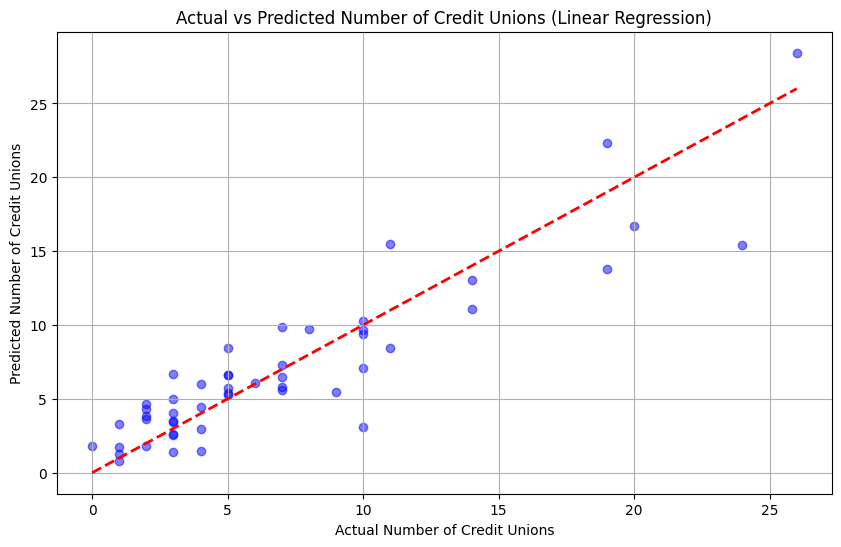

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = merged_data[['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Population', 'Number of households', 'Share']]
y = merged_data['Number of Credit Unions']  # Target variable: Number of Credit Unions

# create a linear regression model
model = LinearRegression()

# fit the model
model.fit(X, y)

# make predictions
predictions = model.predict(X)

# calculate residuals
residuals = y - predictions

# define a stricter threshold (e.g., based on residuals)
strict_threshold = -2  

# get the counties with significantly fewer credit unions 
counties_strictly_under_regression_line = merged_data[residuals < strict_threshold]

# print names under regression line
print("Counties strictly under the regression line (fewer credit unions than predicted):")
print(counties_strictly_under_regression_line['County'].tolist())

# evaluate model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

# evaluation metrics
print(f"\nMean Squared Error: {mse:.2f}")
print(f'R-squared: {r2:.2f}')

# visualization
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2, linestyle='--')  # Regression line (y=x)
plt.xlabel("Actual Number of Credit Unions")
plt.ylabel("Predicted Number of Credit Unions")
plt.title("Actual vs Predicted Number of Credit Unions (Linear Regression)")
plt.grid(True)
plt.show()
